## Workflow
* Get the data ready
* Pick your model to suit the problem
* Fit the model to the data and make a prediction
* Evaluate the model
* Improve through experimentation
* Save and reload your trained model

This notebook demonstrates functions of the Scikit-learn library

This covers:
1. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choosing the right estimator/alg for the problem
3. Fitting the model/alg and use it to make predictions on data
4. Evaluating the model
5. Improving the model
6. Saving and loading a trained model

## End-to-end sklearn workflow

In [2]:
# Getting the data ready

import pandas as pd

heart_disease = pd.read_csv('heart-disease.csv')

heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Way to solve warnings

In [3]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
executable: C:\Users\Fabius S Pop\Desktop\notebookFSP\Scripts\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.5.2
          pip: 24.2
   setuptools: 75.2.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 16
         prefix: libopenblas
       filepath: C:\Users\Fabius S Pop\Desktop\notebookFSP\Lib\site-packages\numpy.libs\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Zen

       user_api: openmp
   internal_api: openmp
    num_threads: 16
         prefix: vcomp
       filepath: C:\Users\Fabius S Pop\Desktop\notebookFSP\Lib\site-pac

In [4]:
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

## -------------------------------------

In [5]:
# Creating the features matrix
X = heart_disease.drop("target", axis = 1)

# Creating the label matrix
y = heart_disease['target']

In [6]:
# Choosing the right estimator and hyperparams
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we will keep the default hyperparams
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
# Fitting the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
clf.fit(X_train, y_train);

In [9]:
import numpy as np

In [10]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [11]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2


In [12]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [13]:
# Evaluating the model on training data and test data

clf.score(X_train, y_train)

1.0

In [14]:
clf.score(X_test, y_test)

0.8688524590163934

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 4, 28]], dtype=int64)

In [17]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [18]:
# IMPROVING THE MODEL

# Trying different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 86.89%

Trying model with 20 estimators...
Model accuracy on test set: 75.41%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 78.69%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 85.25%



In [19]:
# Saving the model and loading it

import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

## 1. Getting your data ready

3 main things:
1. split the data into features and labels (x, y)
2. filling (= imputing) or disregarding missing values
3. converting non-numerical values to numerical values (= feature encoding)

In [21]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
X = heart_disease.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape

(303, 13)

### Data science quick tip
clean data -> transform data -> reduce data

### 1.1. Making sure all data is NUMERICAL

In [28]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
# Splitting into X/y

X = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [33]:
# # Build machine learning model

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(X_train, y_train)

# model.score(X_test, y_test)

In [34]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [35]:
# Turning the catefories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(X)

In [36]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [39]:
# Refitting the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

In [40]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2. Dealing with missing data
1. Filling with some value (= imputation).
2. Remove the samples with missing data altogether.

In [43]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# Creating X, y

X = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [46]:
# # Converting data to numbers
# # Turning the categories into numbers
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categorical_features = ["Make", "Colour", "Doors"]

# one_hot = OneHotEncoder()

# transformer = ColumnTransformer([('one_hot', 
#                                   one_hot, 
#                                   categorical_features)], 
#                                 remainder = "passthrough")

# transformed_X = transformer.fit_transform(X)

In [47]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [48]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

#### Option 1: filling missing data with Pandas:

In [49]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# same for Odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), 
                                          inplace = True)

# same for Doors
car_sales_missing["Doors"].fillna(4, inplace = True)

In [50]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [51]:
# Removing rows with missing Price value
car_sales_missing.dropna(inplace = True)

In [52]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
len(car_sales_missing)

950

In [54]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [55]:
# Converting data to numbers
# Turning the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)

In [56]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with sklearn

In [58]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')

In [59]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [61]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
# dropping rows with no labels
car_sales_missing.isna().sum()

car_sales_missing.dropna(subset = ['Price'], inplace = True)

car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]


In [67]:
# Filling missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical valeus with mean

cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Creating an imputer (fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transforming the data

filled_X = imputer.fit_transform(X)
filled_X 


array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [73]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns = ["Make", 'Colour', 'Doors', 'Odometer (KM'])

car_sales_filled.isna().sum()

Make            0
Colour          0
Doors           0
Odometer (KM    0
dtype: int64

In [75]:
# Converting data to numbers
# Turning the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  categorical_features)], 
                                remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [77]:
# We got our data as numbers and filled 

In [79]:
# Fitting the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.21990196728583944

In [80]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm

Sklearn uses estimator as another term for ML model or algorithm

- Classification
- Regression

### 2.1. Choosing a ML model for a regression problem

In [92]:
# Import the Boston housing dataset
boston = pd.read_csv('boston.csv', skiprows=1)  # Skip the first row

# Define the correct column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston.columns = columns

boston.head()

boston_df = boston.copy()  
boston_df['target'] = boston['MEDV']  

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [93]:
# How many samples?
len(boston_df)

506

In [94]:
# Trying the ridge regression model

from sklearn.linear_model import Ridge

np.random.seed(42)

# Creating the data
X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Ridge()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9999999958220656

#### How do you improve the score? 
#### What if the model wasn't working? 
#### Check sklearn ml map

https://scikit-learn.org/stable/machine_learning_map.html

In [101]:
# Trying Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiating random forest regressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.9997254225398743

### 2.2. Choosing an estimator for a classification problem

In [102]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
len(heart_disease)

303

In [106]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC(max_iter = 10000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8688524590163934

In [107]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [108]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

## Use ensembled methods for structured data
## Use deep learning or transfer learning for unstructured data (images, audio, etc)

## 3. Fitting the model to the data and using it to make prediction on the data

### 3.1. Fitting the model to the data

- X = features, features variables, data
- y = labels, targets, target variables

In [116]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

# Fit the model to the data (training the ml model)
clf.fit(X_train, y_train)

# use the patterns the model has learned
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [118]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2. Make predictions using a ML model

2 ways to make predictions:
- predict()
- predict_proba()

In [119]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [120]:
# Using a trained model to make predictions

clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [121]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

#### Comparing predictions to truth labels to evaluate the model

In [122]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [123]:
clf.score(X_test, y_test)

0.8524590163934426

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### Making predictions with `predict_proba()`

In [125]:
# predict_proba() returns probabilities of a classification label

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [126]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [127]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models. 

In [130]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [131]:
y_preds[:10]

array([23.586, 32.331, 13.543, 22.821, 16.102, 19.964, 17.722, 13.894,
       19.591, 16.688])

In [132]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [134]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.07111764705882404

## 4. Evaluating a ML model

3 ways to evaluate sklearn models/estimators:
- Estimator `score` method
- The `scoring` parameter
- Problem-specific metric function

### Evaluating a model with the `score` method

In [135]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
clf.score(X_train, y_train)

1.0

In [137]:
clf.score(X_test, y_test)

0.8524590163934426

### for regression

In [138]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [139]:
model.score(X_test, y_test)

0.9997254225398743

### 4.2. Evaluating a model using the `scoring` parameter

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [143]:
clf.score(X_test, y_test)

0.8524590163934426

In [145]:
cross_val_score(clf, X, y, cv = 5)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [146]:
cross_val_score(clf, X, y, cv = 10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [147]:
np.random.seed(42)

# Getting a single train test split score

clf_single_score = clf.score(X_test, y_test)

# Take mean of 5 fold cross val score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Comparing the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [149]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [150]:
# Scoring parameter set to None by default

cross_val_score(clf, X, y, cv = 5, scoring = None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

### 4.2.1. Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

In [158]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y,  cv = 5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [156]:
np.mean(cross_val_score)

0.8248087431693989

In [157]:
print(f'Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart disease classifier cross-validated accuracy: 82.48%


#### Area under ROC (receiver operating characteristic) curve
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [159]:
# Create X_test ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [163]:
from sklearn.metrics import roc_curve

# Fitting the classifier
clf.fit(X_train, y_train)

# Making predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.16, 0.84],
        [0.49, 0.51],
        [0.78, 0.22],
        [0.55, 0.45],
        [0.1 , 0.9 ],
        [0.29, 0.71],
        [0.98, 0.02],
        [0.1 , 0.9 ],
        [0.46, 0.54]]),
 61)

In [165]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.42, 0.84, 0.51, 0.22, 0.45, 0.9 , 0.71, 0.02, 0.9 , 0.54])

In [166]:
# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.24137931, 0.24137931, 0.27586207, 0.34482759,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.51724138,
       0.51724138, 0.55172414, 0.5862069 , 0.65517241, 0.72413793,
       0.79310345, 1.        ])

#### Plotting ROC

In [169]:
# Creating a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """

    plt.plot(fpr, tpr, color = 'red', label = 'ROC')

    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'Guessing')

    # Customizing the plot
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

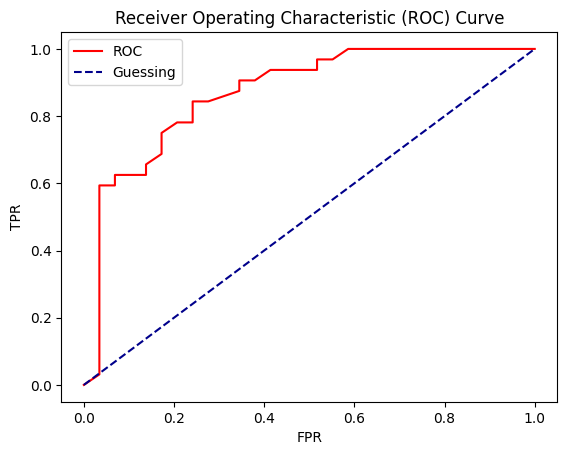

In [170]:
plot_roc_curve(fpr, tpr)

In [172]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8701508620689655

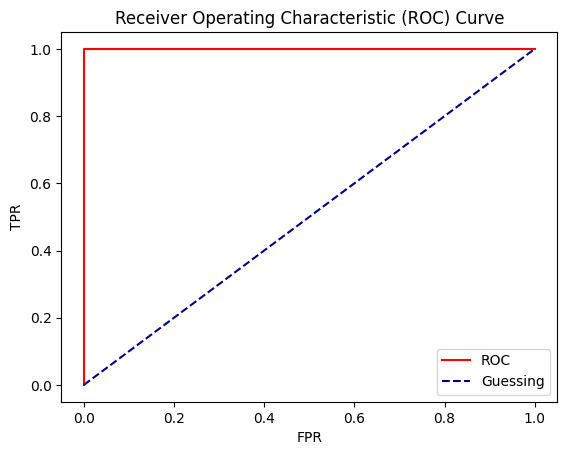

In [173]:
# Plotting perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [174]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion matrix 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supossed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [176]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 5, 27]], dtype=int64)

In [180]:
# Visualizing confusion amtrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames = ['Actual Label'], colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Label,,
0,22,7
1,5,27


In [183]:
# False positives: [0][1]
# False negative: [1][0]
# True positives, true negatives: [0][0], [1][1]

In [184]:
len(X_test)

61

<Axes: >

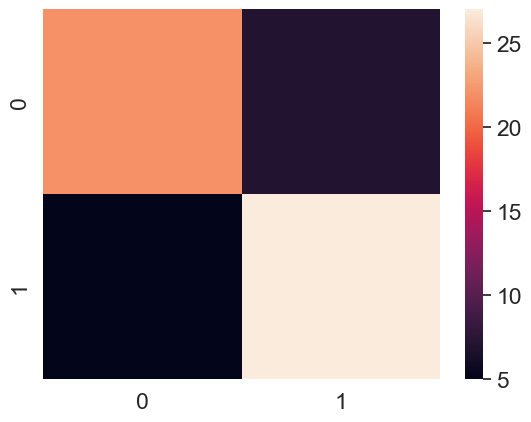

In [186]:
# Make our confusion matrix more visual with Seaborn's heatmap()

import seaborn as sns

# Setting the font scale
sns.set(font_scale = 1.5)

# Creating a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plotting using Seaborn
sns.heatmap(conf_mat)

In [189]:
def plot_conf_mat(conf_mat):
    """
    Plotting a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(conf_mat, 
                     annot = True, # Annotate the boxes with conf_mat info 
                     cbar = False)

    plt.xlabel("Predicted label")
    plt.ylabel("True label")

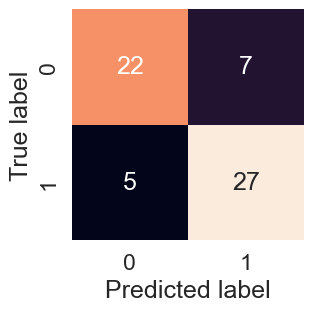

In [190]:
plot_conf_mat(conf_mat)

#### Classification report

In [192]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Where precision and recall become valuable

In [193]:
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Note: watch out for the `accuracy` when you have a HIGH CLASS IMBALANCE

### Use a wide spectrum of evaluation metrics for your classification model

To summarize classification metrics:
- `Accuracy` is a good measure to start with if all classes are balanced.
- `Precision` and `recall` become more important when classes are imbalanced.
- If false positive predictions are worse than false negative, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- `F1-score` is a combination of precision and recall.

### 4.2.2. Regression model evaluation metrics

1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

### R^2

** Compares your models predictions to the mean of the targets. Values can range from negative inf (very poor model) to 1.**

Eg: If all your model does is predict the mean of the targets, it's R^2 values would be 0.
    If your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [198]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [200]:
model.score(X_test, y_test)

0.9997254225398743

In [203]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [206]:
y_test.mean()

21.488235294117644

In [207]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [208]:
r2_score(y_test, y_test_mean)

0.0

In [209]:
r2_score(y_test, y_test)

1.0

### Mean absolute error (MAE)

- the average of the absolute differences between predictions and actual values.
- Gives an idea of how wrong the models predictions are

In [210]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.07111764705882404

In [211]:
df = pd.DataFrame(data = {"actual values": y_test,
                         "predicted values" : y_preds})

df

,actual values,predicted values
173,23.6,23.586
274,32.4,32.331
491,13.6,13.543
72,22.8,22.821
452,16.1,16.102
...,...,...
412,17.9,17.764
436,9.6,9.832
411,17.2,17.247
86,22.5,22.497


In [213]:
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.586,-0.014
274,32.4,32.331,-0.069
491,13.6,13.543,-0.057
72,22.8,22.821,0.021
452,16.1,16.102,0.002
...,...,...,...
412,17.9,17.764,-0.136
436,9.6,9.832,0.232
411,17.2,17.247,0.047
86,22.5,22.497,-0.003


### Mean squared error (MSE)

In [214]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse 

0.020135803921568565

In [216]:
# Calculating MSE by hand

squared = np.square(df['differences'])
squared.mean()

0.020135803921568565

### Note: Minimize MAE & MSE while maximizing R^2

### 4.2.3. Using the `scoring` parameter

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [222]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [223]:
# cross val accuracy
print(f'The cross val acc is: {np.mean(cv_acc)*100:.2f}%')

The cross val acc is: 82.48%


In [225]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
print(f'The cross val acc is: {np.mean(cv_acc)*100:.2f}%')

The cross val acc is: 82.48%


In [228]:
# precision
cv_precision = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
np.mean(cv_precision)

0.8357542034012623

In [229]:
# recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
np.mean(cv_recall)

0.8727272727272727

In [230]:
# f1 
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
np.mean(cv_f1)

0.8256946143361409

#### What about the regression model?`

In [232]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

model = RandomForestRegressor()

In [235]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = None)
np.mean(cv_r2)

0.9989234810030629

In [234]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
cv_r2

array([0.99966456, 0.99899961, 0.99724252, 0.99936393, 0.99934678])

In [237]:
# MAE
cv_mae = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
cv_mae

array([-0.06382353, -0.12424752, -0.21550495, -0.12716832, -0.08484158])

In [239]:
# MSE
cv_mse = cross_val_score(model, X, y, cv = 5, scoring = 'neg_mean_squared_error')
np.mean(cv_mse)

-0.07066444350611514

### 4.3 Using different evaluation metrics as sklearn functions

- Classification evaluation functions

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [242]:
# Making predictions
y_preds = clf.predict(X_test)

# Evaluating the classifier
print("Classifier metric on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metric on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


#### Regression evaluation functions

In [244]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop('target', axis = 1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_preds = model.predict(X_test)

# Evaluating the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.9997254225398743
MAE: 0.07111764705882404
MSE: 0.020135803921568565


## 5. Improving them model
First predictions = baseline predictions
First model = baseline model

Improve:
1. From a data perspective:
   * Could we collect more data?
   * Could we improve our data?
2. From a model perspective:
   * Is there a better model we could use?
   * Could we improve the current model?

`Parameters` = model finds these patterns in data

`Hyperparameters` = settings on a model you can adjust to (potentially) improve its ability to find patterns

In [245]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [246]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1. Tuning hyperparams by hand

3 sets: training, validation, test

In [247]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples-split`
* `n_estimators`


In [297]:
def evaluate_preds(y_true, y_pred):
    '''
    Performs evaluation comparison on y_true labels 
    vs y_pred labels on a classification problem.
    '''
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_dict = {"accuracy" : round(accuracy, 2),
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}


    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [298]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [299]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffling the data
heart_disease_shuffled = heart_disease.sample(frac = 1)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split the data into train, val, test sets
train_split = round (0.7 * len(heart_disease_shuffled)) # 70%
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15%
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [300]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

# Tune on val data (make baseline predictions)
y_preds = clf.predict(X_valid)

# Evaluate classifier on val set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [301]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [302]:
np.random.seed(42)

# Creating a second classifier with different parameters
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, y_train)

# Making predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluating the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [303]:
clf_3 = RandomForestClassifier(n_estimators = 100,
                              max_depth = 10)

### 5.2. Hyperparameter tuning with RandomizedSearchCV

In [304]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
       'max_depth' : [None, 5, 10, 20, 30],
       'max_features' : ['auto', 'sqrt'],
       'min_samples_split' : [2, 4, 6],
       'min_samples_leaf' : [1, 2, 4]}

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RnadomForestClassifier

clf = RandomForestClassifier(n_jobs = 1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf, 
                           param_distributions = grid,
                           n_iter = 10, #no of models to try
                           cv = 5, 
                           verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [305]:
rs_clf.best_params_   # shows the best cross validated results

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [306]:
# Making predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluating the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3. Hyperparameter tuning with GridSearchCV
applies a brute force search 

In [307]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [308]:
grid_2 = {
    'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]   
}

In [309]:
3 * 1 * 2 * 1 * 2 * 5

60

In [310]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target', axis = 1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs = 1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf, 
                    param_grid = grid_2,
                    cv = 5, 
                    verbose = 2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [311]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [312]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Comparing our different models metrics. 

<Axes: >

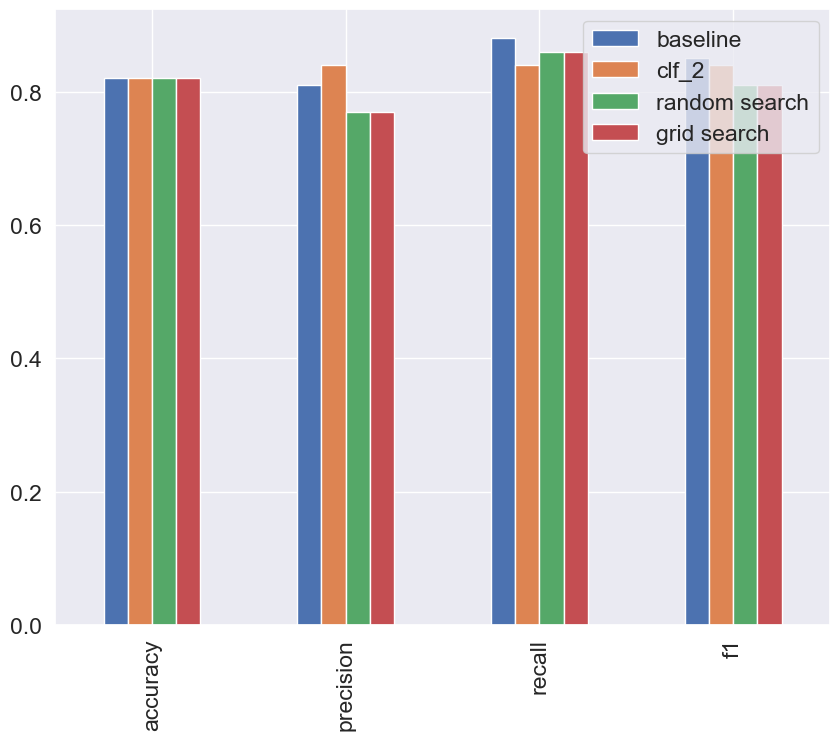

In [313]:
compare_metrics = pd.DataFrame({'baseline' : baseline_metrics,
                              'clf_2' : clf_2_metrics,
                              'random search' : rs_metrics,
                              'grid search' : gs_metrics})

compare_metrics.plot.bar(figsize = (10, 8))

## 6. Saving & loading a trained model

Two ways: 
1. With python's `pickle` module
2. With the `joblib` module

In [314]:
import pickle 

# Save an existing model to file 
pickle.dump(gs_clf, open('gs_random_random_forest_model_1.pkl',  'wb'))

In [316]:
# Loading a saved model
loaded_pickle_model = pickle.load(open('gs_random_random_forest_model_1.pkl', 'rb'))

In [318]:
# Making predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

------------------------------------------

**Joblib**

In [320]:
from joblib import dump, load
# save model to file
dump(gs_clf, filename = 'gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [321]:
# loading a model
loaded_job_model = load(filename = 'gs_random_forest_model_1.joblib')


In [323]:
# evaluate predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}